# Base model

In [ ]:
import json
import warnings

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

warnings.filterwarnings("ignore")

In [93]:
# Global variables
BATCH_SIZE = 128
EPOCHS = 100

In [94]:
# Get the class weights from a JSON file
with open('class_weights.json', "r") as f:
    class_weight_dict = json.load(f)

In [95]:
# Preprocessed data
X_train = np.load('preprocessed_data/X_train.npy')
y_train = np.load('preprocessed_data/y_train.npy')
X_test = np.load('preprocessed_data/X_test.npy')
y_test = np.load('preprocessed_data/y_test.npy')

In [96]:
# Transform the y_train and y_test labels to categorical
y_train_cat = to_categorical(y_train, num_classes=len(np.unique(y_train)))
y_test_cat = to_categorical(y_test, num_classes=len(np.unique(y_train)))

In [97]:
# Model definition
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(60, X_train.shape[2])))
model.add(Dropout(0.3))
model.add(LSTM(32))
model.add(Dropout(0.2))
model.add(Dense(len(np.unique(y_train)), activation='softmax'))

In [98]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [99]:
# Early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [100]:
# Train the model
history = model.fit(
    X_train, y_train_cat,
    validation_data=(X_test, y_test_cat),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    class_weight=class_weight_dict,
    callbacks=[early_stop]
)

Epoch 1/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.4902 - loss: 1.3267 - val_accuracy: 0.6375 - val_loss: 0.9291
Epoch 2/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.6415 - loss: 0.9308 - val_accuracy: 0.6591 - val_loss: 0.8639
Epoch 3/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.6776 - loss: 0.8222 - val_accuracy: 0.6921 - val_loss: 0.7507
Epoch 4/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.6920 - loss: 0.7661 - val_accuracy: 0.7184 - val_loss: 0.7361
Epoch 5/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.7151 - loss: 0.7170 - val_accuracy: 0.7563 - val_loss: 0.6257
Epoch 6/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.7342 - loss: 0.6661 - val_accuracy: 0.7542 - val_loss: 0.6337
Epoch 7/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.7333 - loss: 0.6562 - val_accuracy: 0.7467 - val_loss: 0.6336
Epoch 8/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.7317 - loss: 0.6606 - 

274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


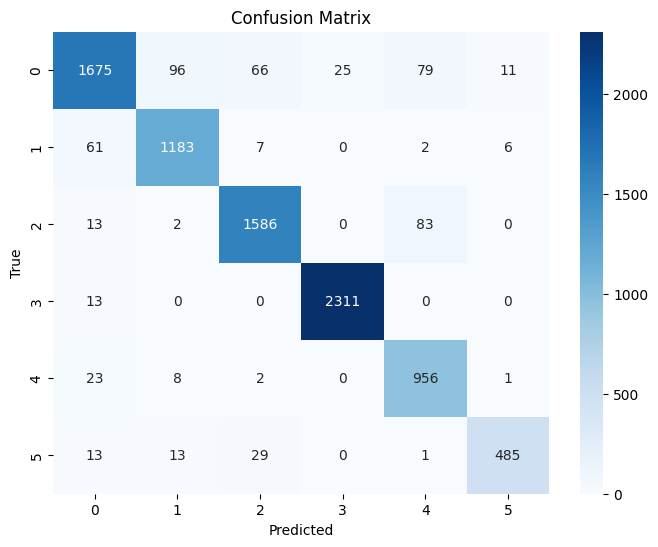

In [101]:
# Predictions
y_pred = model.predict(X_test).argmax(axis=1)
y_true = y_test

# Confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [102]:
# Classification report
print(classification_report(y_true, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.932     0.858     0.893      1952
           1      0.909     0.940     0.924      1259
           2      0.938     0.942     0.940      1684
           3      0.989     0.994     0.992      2324
           4      0.853     0.966     0.906       990
           5      0.964     0.896     0.929       541

    accuracy                          0.937      8750
   macro avg      0.931     0.933     0.931      8750
weighted avg      0.938     0.937     0.937      8750



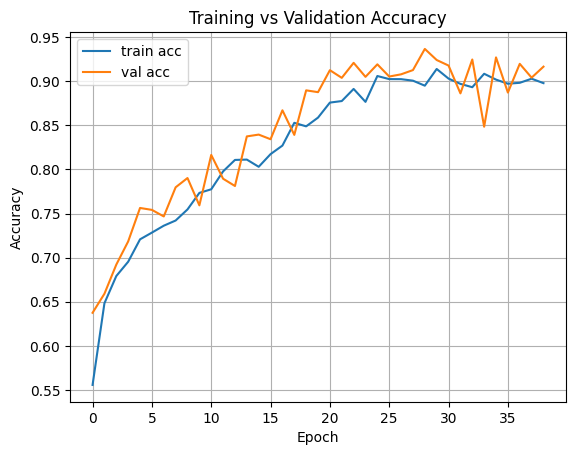

In [103]:
# Plot the training history
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.grid(True)
plt.show()

In [104]:
# Save the model
model.save('trained_models/lstm_base_model.h5')
model.save('trained_models/lstm_base_model.keras')